# Logistic Regression with Keras

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.append('/Users/kaonpark/workspace/github.com/likejazz/kaon-learn')
import kaonlearn
from kaonlearn.plots import plot_decision_regions

In [2]:
x_data = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
y_data = np.array([0, 0, 0, 1, 1, 1])

In [3]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=2))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3.0
Trainable params: 3
Non-trainable params: 0.0
_________________________________________________________________


In [4]:
from keras_tqdm import TQDMNotebookCallback
model.fit(x_data, y_data, epochs=10000, verbose=0, callbacks=[TQDMNotebookCallback(show_inner=False)])

In [5]:
evaluation = model.evaluate(x_data, y_data)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

6/6 [==============================] - 0s
Summary: Loss over the test dataset: 0.12, Accuracy: 1.00


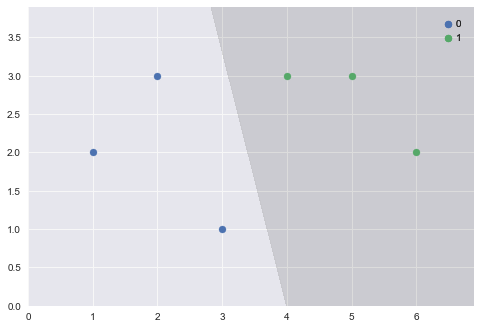

In [6]:
plot_decision_regions(x_data, y_data, clf=model)

# Logistic Regression with liblinear, sag

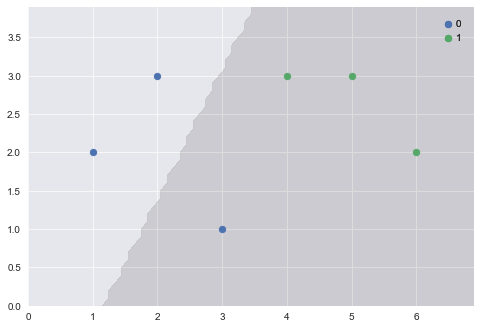

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear').fit(x_data, y_data)
plot_decision_regions(x_data, y_data, clf=clf)

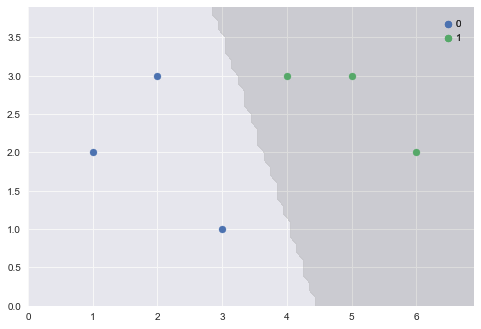

In [8]:
clf = LogisticRegression(max_iter=5000,solver='sag').fit(x_data, y_data)
plot_decision_regions(x_data, y_data, clf=clf)

# Linear Regression

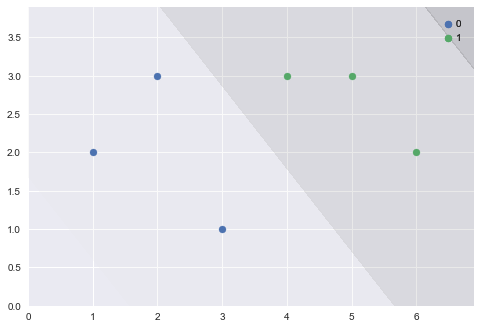

In [9]:
# ignore scipy warnings(hack)
# https://github.com/scipy/scipy/issues/5998#issuecomment-244277948
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(x_data, y_data)
plot_decision_regions(x_data, y_data, clf=clf)

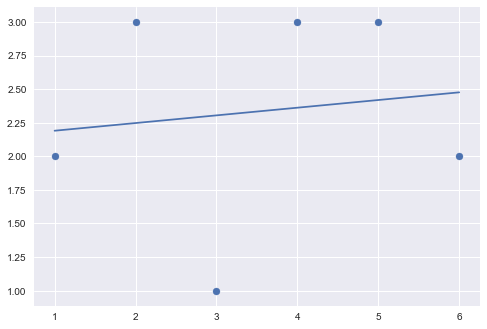

In [10]:
linear_x = x_data[:,0].reshape(-1,1)
linear_y = x_data[:,1]
clf = LinearRegression().fit(linear_x, linear_y)

plt.scatter(linear_x, linear_y)
plt.plot(linear_x, clf.predict(linear_x))